In [1]:
import numpy as np

In [2]:
from past.builtins import xrange


### For Softmax

In [24]:
scores = np.array([1,-2,0])

In [25]:
np.exp(scores)/np.sum(np.exp(scores))

array([0.70538451, 0.03511903, 0.25949646])

In [26]:
scores -= np.max(scores)

np.exp(scores)/np.sum(np.exp(scores))

array([0.70538451, 0.03511903, 0.25949646])

### For SVM

In [3]:
from cs231n.classifiers.linear_svm import svm_loss_naive,svm_loss_vectorized

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
x = np.array([[6,6,8,1],[2,9,0,8],[2,5,4,8]])
w = np.array([[2,0],[3,0],[1,4],[3,1]])
dot = np.dot(x,w)
y_true = np.array([1,0,1])


In [6]:
S_true = dot[np.arange(3),np.squeeze(y_true)]

In [7]:
loss,drw = svm_loss_naive(w,x,y_true,0.05)

In [8]:
drw * 3

array([[  8.6,  -8. ],
       [ 11.9, -11. ],
       [ 12.3, -10.8],
       [  9.9,  -8.7]])

In [9]:
loss2,drw2 = svm_loss_vectorized(w,x,y_true,0.05)

In [10]:
drw2 * 3

array([[ 8.6, -2. ],
       [11.9, -5. ],
       [12.3, -2.8],
       [ 9.9, -7.7]])

In [11]:
drw - drw2

array([[ 0.        , -2.        ],
       [ 0.        , -2.        ],
       [ 0.        , -2.66666667],
       [ 0.        , -0.33333333]])

In [19]:
(dot.T - dot[np.arange(3),y_true]).T + 1

array([[  9,   1],
       [  1, -46],
       [ 24,   1]])

In [29]:
dW = np.zeros_like(w)
dW[:,1] -= (x[0] + x[2])
dW[:,0] += (x[0] + x[2])
print(dW)

[[  8  -8]
 [ 11 -11]
 [ 12 -12]
 [  9  -9]]


In [30]:
dW = dW.astype('float')

In [31]:
dW /= 3

In [32]:
dW

array([[ 2.66666667, -2.66666667],
       [ 3.66666667, -3.66666667],
       [ 4.        , -4.        ],
       [ 3.        , -3.        ]])

In [33]:
dW += (2 * w * 0.05)

In [34]:
dW

array([[ 2.86666667, -2.66666667],
       [ 3.96666667, -3.66666667],
       [ 4.1       , -3.6       ],
       [ 3.3       , -2.9       ]])

In [35]:
dW * 3

array([[  8.6,  -8. ],
       [ 11.9, -11. ],
       [ 12.3, -10.8],
       [  9.9,  -8.7]])

In [36]:
margins = np.maximum(0,(dot.T - dot[np.arange(3),y_true]).T + 1)

In [38]:
margins[range(3),y_true] = 0

In [39]:
margins

array([[ 9,  0],
       [ 0,  0],
       [24,  0]])

In [40]:
positive = margins > 0
positive

array([[ True, False],
       [False, False],
       [ True, False]])

In [66]:
dWT = np.zeros_like(w).T

In [77]:
positive =( margins > 0).astype(int)

In [78]:
np.dot(x.T, positive)

array([[ 8,  0],
       [11,  0],
       [12,  0],
       [ 9,  0]])

In [79]:
p2 = positive

In [80]:
p2[range(3),y_true] -= np.sum(positive,axis=1)

In [81]:
p2

array([[ 1, -1],
       [ 0,  0],
       [ 1, -1]])

In [82]:
np.dot(x.T,p2)

array([[  8,  -8],
       [ 11, -11],
       [ 12, -12],
       [  9,  -9]])

## For NN

In [2]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

In [4]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


In [5]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


In [6]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738420e-09


Final training loss:  0.01650473023882189


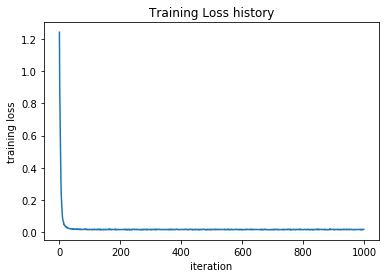

In [35]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=1000, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

In [10]:
net = init_toy_model()

In [12]:
num_train = X.shape[0]
batch_size = 200

In [32]:
item = np.random.choice(num_train,batch_size)

X_batch = X[item]

y_batch = y[item]

In [18]:
reg = 5e-6

In [33]:
loss, grads = net.loss(X_batch,y=y_batch,reg=reg)

In [34]:
net.params['W2'] -= grads['W2']
net.params['b2'] -= grads['b2']
net.params['W1'] -= grads['W1']
net.params['b1'] -= grads['b1']

In [26]:
X_batch = X[item]

y_batch = y[item]

In [27]:
loss, grads = net.loss(X_batch,y=y_batch,reg=reg)

In [28]:
net.params['W2'] -= grads['W2']
net.params['b2'] -= grads['b2']
net.params['W1'] -= grads['W1']
net.params['b1'] -= grads['b1']